In [12]:
!pip3 install -I numpy==1.15.4

  Using cached https://files.pythonhosted.org/packages/3d/c3/a69406093c9a780a74964f41cd56b06c0346d686a9b3f392d123a663f5e0/numpy-1.15.4-cp37-cp37m-macosx_10_6_intel.macosx_10_9_intel.macosx_10_9_x86_64.macosx_10_10_intel.macosx_10_10_x86_64.whl


In [13]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import datetime
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.arima_model import ARIMA
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
startDate = datetime.date(2020, 1, 22)
urlFormat = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/{}.csv"
todaysDate = datetime.datetime.now().date()
rawDataArray = []

while(startDate != todaysDate):
    dateString = startDate.strftime("%m-%d-%Y")
    url = urlFormat.format(dateString)
    print("url:{}\n".format(url))
    df = pd.read_csv(url, error_bad_lines=False)
    rawDataArray.append(df)
    startDate += datetime.timedelta(days=1)


rawDf = pd.concat(rawDataArray, sort=True)
rawDf.head()

url:https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv

url:https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv

url:https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv

url:https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv

url:https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv

url:https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv

url:https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv

url:https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_co

,Confirmed,Country/Region,Deaths,Last Update,Latitude,Longitude,Province/State,Recovered
0,1.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Anhui,NaN
1,14.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Beijing,NaN
2,6.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Chongqing,NaN
3,1.0,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Fujian,NaN
4,NaN,Mainland China,NaN,1/22/2020 17:00,NaN,NaN,Gansu,NaN


In [15]:
filteredDf = rawDf[rawDf["Country/Region"] == "US"]
filteredDf['Date']= pd.to_datetime(filteredDf['Last Update']) 
filteredDf.drop("Last Update", axis=1, inplace=True)
filteredDf = filteredDf[["Date","Confirmed","Deaths","Recovered"]]
dateCol = filteredDf.apply(lambda row: row["Date"].date(), axis=1)
filteredDf["Date"] = dateCol
filteredDf.head()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Date,Confirmed,Deaths,Recovered
31,2020-01-22,1.0,NaN,NaN
31,2020-01-23,1.0,NaN,NaN
33,2020-01-24,1.0,NaN,NaN
34,2020-01-24,1.0,NaN,NaN
33,2020-01-25,1.0,NaN,NaN


In [16]:
aggDf = filteredDf.groupby('Date').agg({'Confirmed': ['sum','mean', 'min', 'max'], 
                                       'Deaths': ['sum','mean', 'min', 'max'],
                                        'Recovered': ['sum','mean', 'min', 'max']
                                       }).reset_index()
columnMapping = ["Date",
                 "Confirmed",
                 "Confirmed_mean",
                 "Confirmed_min",
                 "Confirmed_max",
                 "Deaths",
                 "Deaths_mean",
                 "Deaths_min",
                 "Deaths_max",
                 "Recovered",
                 "Recovered_mean",
                 "Recovered_min",
                 "Recovered_max"
                ]

aggDf.columns = columnMapping
aggDf.tail()

,Date,Confirmed,Confirmed_mean,Confirmed_min,Confirmed_max,Deaths,Deaths_mean,Deaths_min,Deaths_max,Recovered,Recovered_mean,Recovered_min,Recovered_max
39,2020-03-16,4847.0,82.152542,1.0,967.0,85.0,1.440678,0.0,48.0,17.0,0.288136,0.0,6.0
40,2020-03-17,6585.0,107.950820,1.0,1706.0,112.0,1.836066,0.0,55.0,17.0,0.278689,0.0,6.0
41,2020-03-18,7460.0,158.723404,1.0,2495.0,115.0,2.446809,0.0,55.0,106.0,2.255319,0.0,106.0
42,2020-03-19,13648.0,252.740741,1.0,5365.0,199.0,3.685185,0.0,74.0,108.0,2.000000,0.0,108.0
43,2020-03-20,19057.0,340.303571,1.0,8310.0,244.0,4.357143,0.0,83.0,147.0,2.625000,0.0,147.0


In [17]:
sortedDf = aggDf.sort_values("Date")
sortedDf.head()

,Date,Confirmed,Confirmed_mean,Confirmed_min,Confirmed_max,Deaths,Deaths_mean,Deaths_min,Deaths_max,Recovered,Recovered_mean,Recovered_min,Recovered_max
0,2020-01-22,1.0,1.00,1.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2020-01-23,1.0,1.00,1.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2020-01-24,2.0,1.00,1.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2020-01-25,2.0,1.00,1.0,1.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2020-01-26,5.0,1.25,1.0,2.0,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN


### Training

Creating Model For Deaths


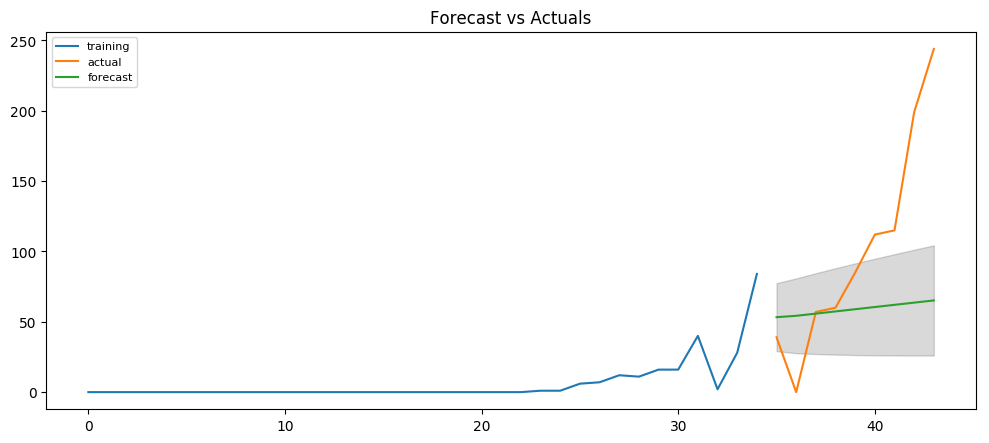

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


ForecastAccuracy: {'mape': inf, 'me': -42.21416306411935, 'mae': 57.44698569815463, 'mpe': inf, 'rmse': 81.37041225302846, 'corr': 0.9401583118189165, 'minmax': 0.4413475723170657}



Creating Model For Confirmed


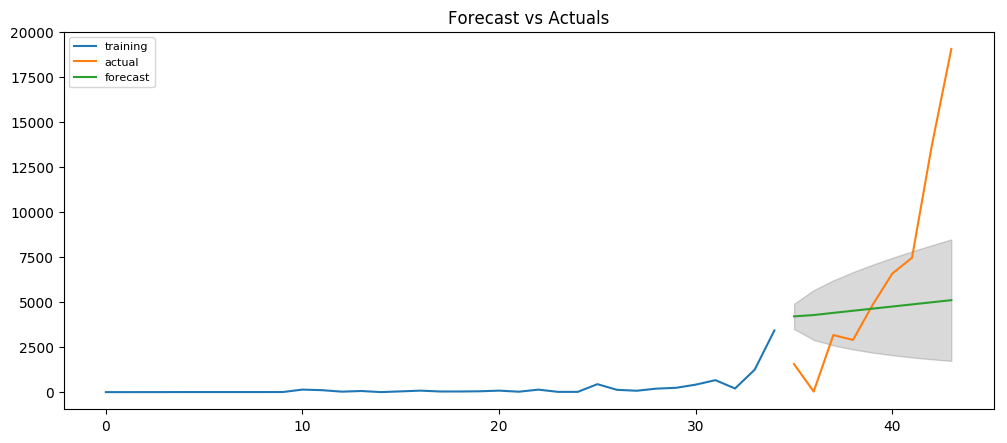

ForecastAccuracy: {'mape': 14.824201200243115, 'me': -1943.31010258756, 'mae': 4109.867104899261, 'mpe': 14.37198808957887, 'rmse': 5858.458185477149, 'corr': 0.9211633443837162, 'minmax': 0.47728176314825965}



Creating Model For Recovered


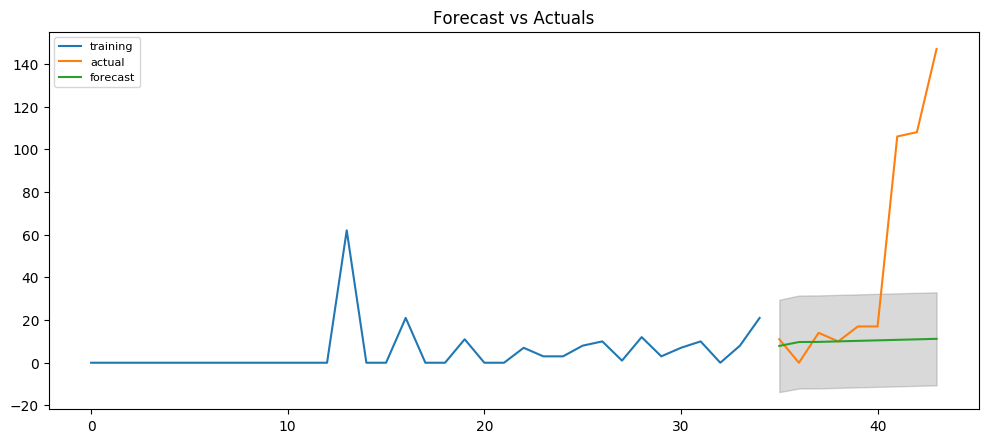

ForecastAccuracy: {'mape': inf, 'me': -37.67005413821513, 'mae': 39.82873370037438, 'mpe': inf, 'rmse': 64.24319473618931, 'corr': 0.6756846295874018, 'minmax': 0.5655326099334068}





In [43]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse,
            'corr':corr, 'minmax':minmax})


def CreateAndEvaluateModel(target, df, splitPct = 0.8): 
    # Find Index to Split on
    count = sortedDf.Date.count()
    index = math.floor(count * splitPct)
    
    # Create Training and Test 
    train = df[target][:index]
    test = df[target][index:]

    # Build Model
    # model = ARIMA(train, order=(3,2,1))  
    model = ARIMA(train, order=(1, 1, 1))  
    fitted = model.fit(disp=-1)  

    # Forecast
    fc, se, conf = fitted.forecast(test.count(), alpha=0.05)  # 95% conf

    # Make as pandas series
    fc_series = pd.Series(fc, index=test.index)
    lower_series = pd.Series(conf[:, 0], index=test.index)
    upper_series = pd.Series(conf[:, 1], index=test.index)

    # Plot
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(train, label='training')
    plt.plot(test, label='actual')
    plt.plot(fc_series, label='forecast')
    plt.fill_between(lower_series.index, lower_series, upper_series, 
                     color='k', alpha=.15)
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
    
    print("ForecastAccuracy: {}\n\n\n".format(forecast_accuracy(fc, test.values)))
    return  model

    

targets = ["Deaths","Confirmed","Recovered"]
resultsDict = {}

for target in targets:
    print("Creating Model For {}".format(target))
    resultsDict[target] = CreateAndEvaluateModel(target, sortedDf)



##### Serialize and Upload to S3

In [48]:
import boto3
import botocore
import pickle
import tarfile

#Upload Model to S3
# BUCKET_NAME = "chi-finesse-covid19-models"
# s3_resource = boto3.resource('s3')
# def upload_to_s3(target):
#     prefix = "models/US/{}/model.tar.gz".format(target)
#     s3_resource.meta.client.upload_file('model_{}.tar.gz'.format(target), BUCKET_NAME, prefix)

#Serialize Model
def serializeAndUploadToS3(model, target):
    with open("model_{}.pkl".format(target), 'wb') as pkl:
        pickle.dump(model, pkl)
        
def readAndDeserializeModel(target):
    with open("model_{}.pkl".format(target), 'rb') as pkl:
        return pickle.load(pkl)
    

In [47]:
for target in targets:
    serializeAndUploadToS3(resultsDict[target],target)

### Prediction

In [53]:
print(todaysDate)
for target in targets:
    model_fit = readAndDeserializeModel(target).fit(disp=0)
    fc, se, conf = model_fit.forecast(1, alpha=0.05)
    print("{} Prediction for {} is {}".format(target,todaysDate,int(round(fc[0]))))
    

2020-03-21
Deaths Prediction for 2020-03-21 is 53
Confirmed Prediction for 2020-03-21 is 4206
Recovered Prediction for 2020-03-21 is 8
